In [1]:
import sys
import os

current_directory = os.getcwd()

project_directory = os.path.abspath(os.path.join(current_directory, '..'))
if project_directory not in sys.path:
    sys.path.append(project_directory)

import sanity_checks_methods
import ML_algorithms
import pandas as pd
import util_inaccuracy

dataset_path = os.path.join(project_directory, 'dataset/stroke_data.csv')
df = pd.read_csv(dataset_path)

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_to_test = df.copy()
df = df.dropna()
df_to_test = sanity_checks_methods.drop_inconsistencies(df_to_test)
df = sanity_checks_methods.drop_inconsistencies(df)

adding 10% of inaccuracies in avg_glucose_level values

ADDING 50% TO FEATURE: avg_glucose_level
--------------------------------------
Modifying 4756 rows in column 'avg_glucose_level'
Rows to modify: [8583, 5926, 1199, 3358, 1664, 5794, 2365, 4654, 3883, 8335, 139, 7756, 4347, 1951, 2147, 110, 9449, 9389, 9505, 3878, 8015, 1132, 6118, 2462, 9511, 6594, 9222, 8143, 8565, 1574, 9223, 4619, 512, 9086, 9170, 6550, 7977, 4674, 3090, 3125, 8644, 8751, 4721, 8703, 2006, 671, 3320, 4908, 8314, 5246, 4449, 6240, 258, 8068, 4790, 715, 8752, 6336, 4416, 6777, 2878, 243, 5873, 5585, 6962, 5570, 43, 643, 3078, 8721, 7816, 2065, 2222, 2248, 5386, 2692, 6634, 8553, 5401, 9390, 8416, 8087, 1991, 6902, 5849, 5807, 1993, 5344, 4027, 5148, 3667, 4101, 7211, 7666, 5179, 5291, 1691, 9359, 2189, 690, 5628, 6840, 151, 8919, 8444, 7639, 6349, 2047, 8806, 6201, 5376, 8502, 7405, 5466, 3343, 2059, 5778, 9089, 7062, 2259, 7543, 4392, 4154, 7744, 903, 158, 5513, 1432, 8763, 4791, 2374, 303, 2628, 6334, 8705, 4172, 1378, 2068, 3105, 425, 2398, 2346, 1770, 3777, 4147,

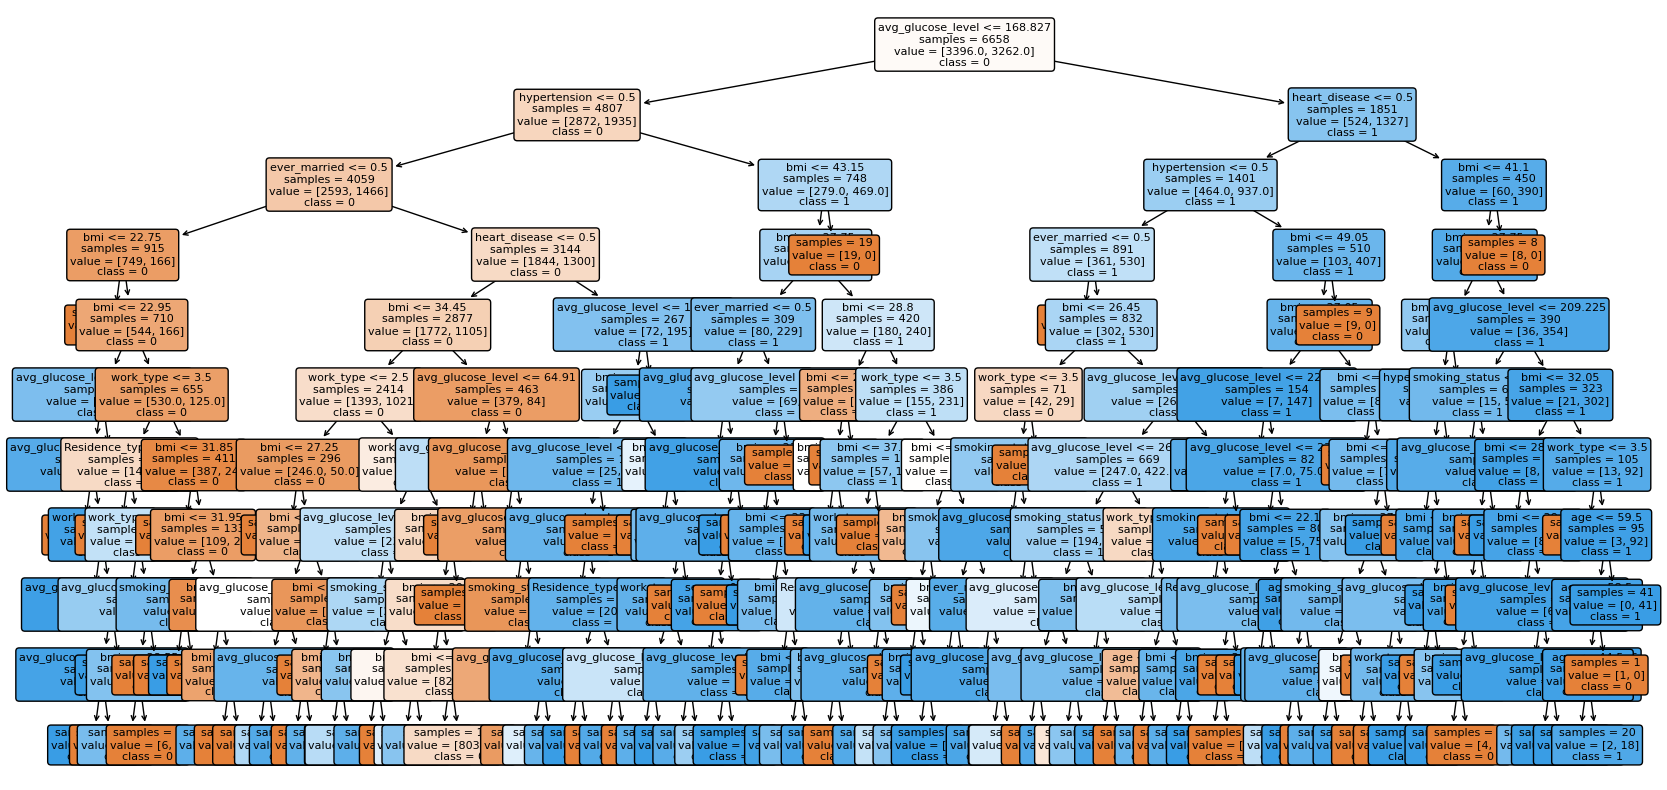

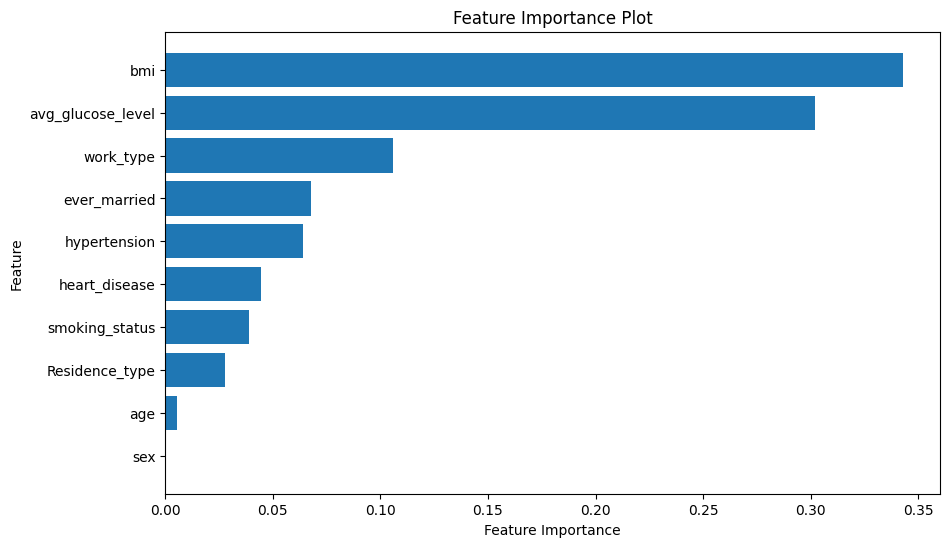

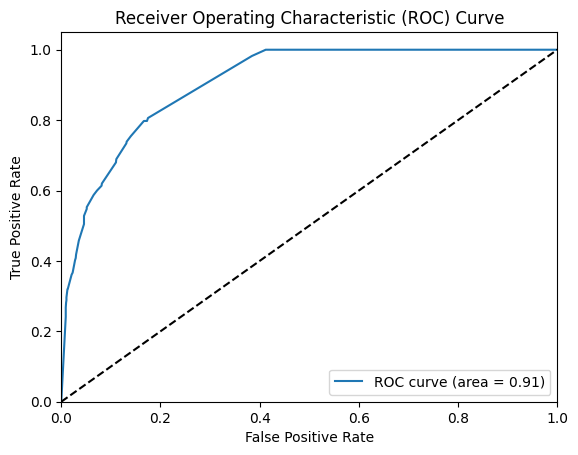

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9066156287433089
Accuracy for each fold: [0.7902097902097902, 0.8286713286713286, 0.8216783216783217, 0.8076923076923077, 0.8315789473684211, 0.8210526315789474, 0.8210526315789474, 0.8491228070175438, 0.8, 0.8245614035087719]
Mean accuracy: 0.8195620169304381
95% confidence interval: (0.8075911920082346, 0.8315328418526415)


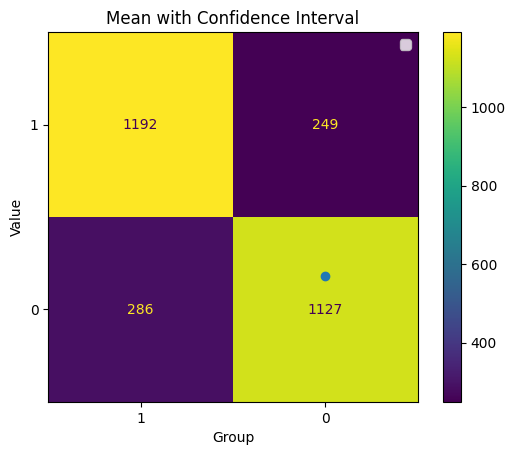


SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.82      0.71      1441
           1       0.73      0.50      0.59      1413

    accuracy                           0.66      2854
   macro avg       0.67      0.66      0.65      2854
weighted avg       0.67      0.66      0.65      2854



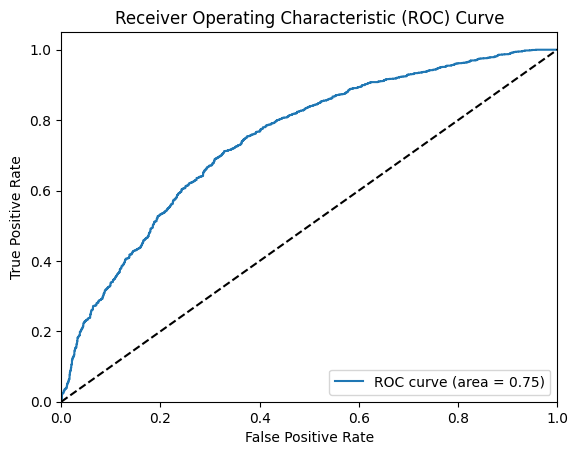

AUC Score: 0.7464959312579287


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6363636363636364, 0.6188811188811189, 0.6748251748251748, 0.6573426573426573, 0.6736842105263158, 0.6771929824561403, 0.6596491228070176, 0.7052631578947368, 0.6491228070175439, 0.6385964912280702]
Mean accuracy: 0.6590921359342412
95% confidence interval: (0.6412859563074479, 0.6768983155610345)


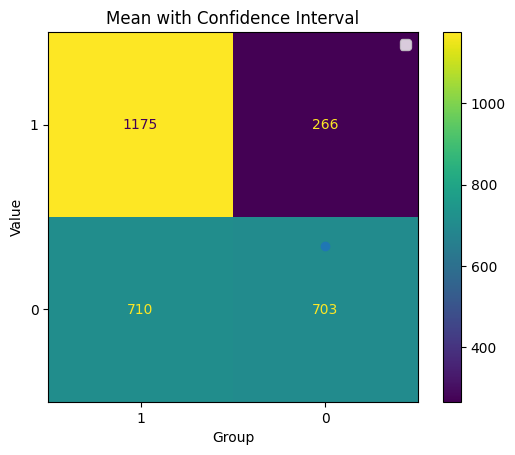

In [2]:

print('ADDING 50% TO FEATURE: avg_glucose_level')
print('--------------------------------------')
df_modified = util_inaccuracy.modify_values('avg_glucose_level', df, 50)

print('\nDECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.model_dt(df_modified, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_to_test)

print('\nSVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
svm = ML_algorithms.model_svm(df_modified, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(svm, df_to_test)


adding 50% of inaccuracies in bmi

ADDING 10% TO FEATURE: bmi
--------------------------------------
Modifying 4756 rows in column 'bmi'
Rows to modify: [4174, 903, 8535, 3252, 8277, 3979, 6604, 4839, 2900, 7990, 4359, 4427, 2027, 6225, 1526, 3834, 5681, 5504, 3053, 6773, 1471, 8589, 2374, 4999, 5772, 5147, 4832, 7249, 6736, 8391, 5400, 9417, 8899, 405, 7806, 966, 2785, 4313, 6026, 5769, 23, 2887, 4513, 5468, 3770, 4932, 7141, 2385, 242, 487, 2812, 3566, 4116, 1935, 3182, 3423, 8442, 275, 118, 2870, 8676, 4796, 3573, 7919, 5951, 6021, 5410, 8082, 7553, 2854, 6471, 5616, 1098, 7923, 6028, 5517, 2987, 9239, 4650, 715, 783, 2245, 270, 6835, 1694, 3663, 4130, 681, 40, 4176, 9280, 1379, 5472, 624, 3478, 4992, 1381, 1250, 9089, 7995, 5009, 7463, 2835, 3262, 700, 436, 6087, 5804, 6617, 7669, 8827, 1658, 2915, 8558, 4604, 6227, 477, 4312, 7285, 1458, 4289, 6540, 6632, 1072, 4199, 9401, 5317, 7867, 3875, 2556, 5259, 2215, 6273, 693, 7635, 305, 4305, 2220, 4476, 2826, 2683, 7398, 6446, 3100, 4414, 8370, 7887, 3976, 1058, 7142, 50

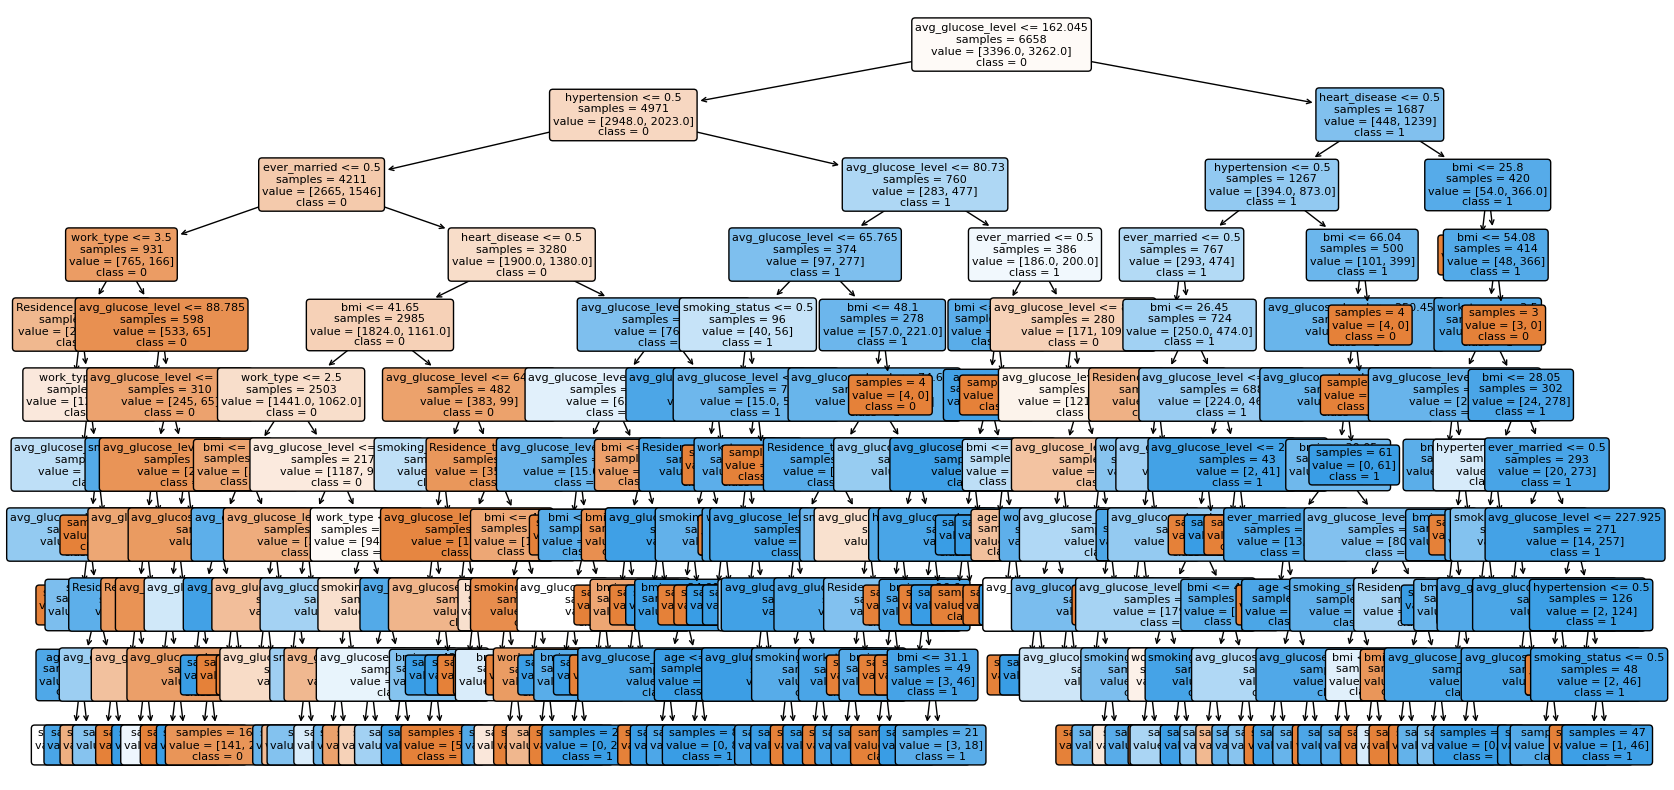

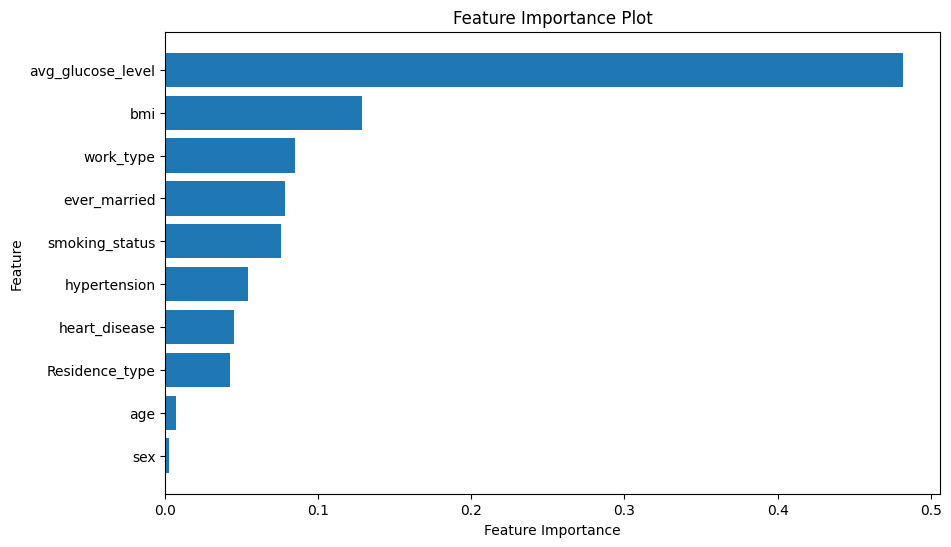

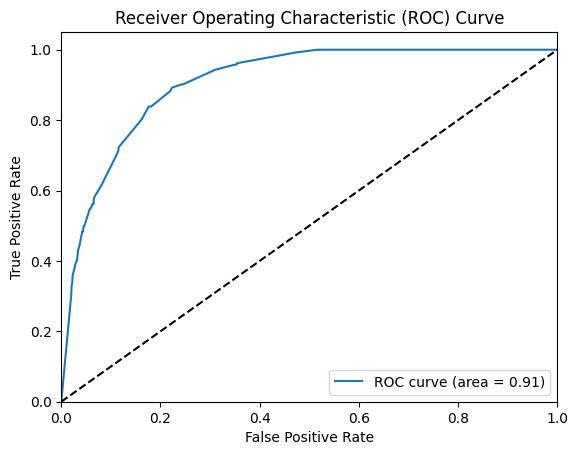

AUC Score: 0.9084595652641552


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7902097902097902, 0.8111888111888111, 0.8111888111888111, 0.7762237762237763, 0.7859649122807018, 0.8315789473684211, 0.8175438596491228, 0.7894736842105263, 0.8070175438596491, 0.8140350877192982]
Mean accuracy: 0.8034425223898909
95% confidence interval: (0.7911626687983445, 0.8157223759814373)


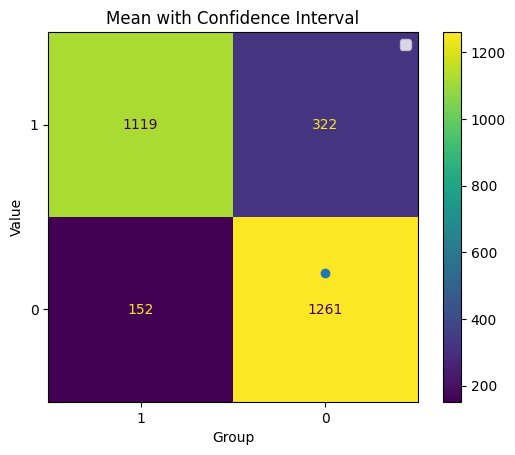


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.65      0.77      0.71      1441
           1       0.71      0.59      0.64      1413

    accuracy                           0.68      2854
   macro avg       0.68      0.68      0.68      2854
weighted avg       0.68      0.68      0.68      2854



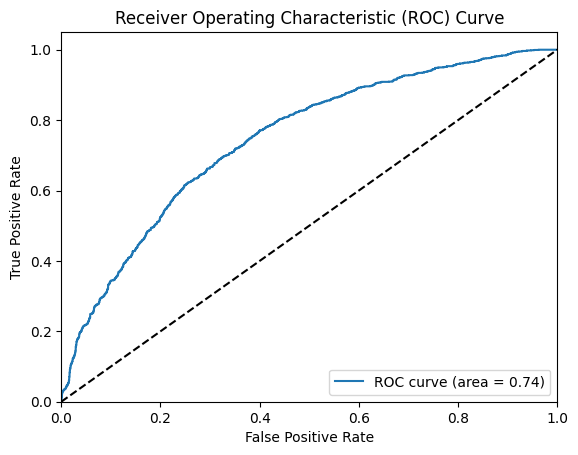

AUC Score: 0.7444931151354062


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6678321678321678, 0.6818181818181818, 0.6678321678321678, 0.6293706293706294, 0.6035087719298246, 0.656140350877193, 0.6807017543859649, 0.6701754385964912, 0.6350877192982456, 0.6771929824561403]
Mean accuracy: 0.6569660164397007
95% confidence interval: (0.6383433575003545, 0.6755886753790468)


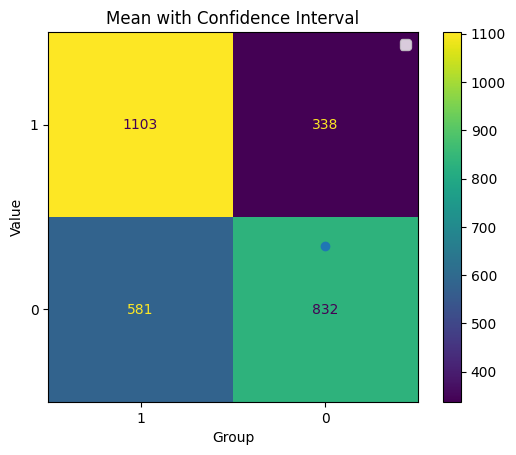

In [3]:
print('ADDING 10% TO FEATURE: bmi')
print('--------------------------------------')
df_modified= util_inaccuracy.modify_values('bmi',df, 50)
print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.model_dt(df_modified, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
svm = ML_algorithms.model_svm(df_modified, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 

inaccuracies on bmi and avg_glucose_level features

ADDING 10% TO FEATURE: avg_glucose_level & bmi
--------------------------------------
Modifying 4756 rows in column 'avg_glucose_level'
Rows to modify: [9280, 9136, 9077, 2422, 7734, 7980, 2591, 511, 367, 2257, 5588, 6840, 4470, 9189, 8207, 5732, 328, 6605, 1342, 5112, 2821, 9209, 8110, 8466, 1956, 7902, 5979, 8318, 8275, 2748, 2720, 7089, 7697, 2367, 2663, 8352, 3343, 8638, 6667, 2536, 7590, 5372, 4893, 5096, 4851, 3302, 5297, 7044, 3502, 1878, 1010, 1513, 3992, 7768, 8873, 9406, 4212, 4126, 8079, 1048, 7611, 2465, 3021, 1074, 9207, 4713, 60, 8572, 7632, 984, 7233, 8408, 1864, 838, 2740, 7773, 8081, 764, 7401, 6634, 8723, 5993, 8019, 3885, 7787, 6196, 3425, 3239, 7404, 2534, 4773, 6665, 5157, 8448, 6560, 7301, 8864, 4306, 2782, 6867, 1299, 6882, 4544, 9265, 9241, 2175, 6694, 8500, 4745, 5348, 1188, 9374, 5421, 5676, 6817, 5298, 3407, 4320, 2996, 7212, 8128, 3438, 1102, 7783, 3255, 8106, 5640, 8048, 4205, 6240, 7489, 8654, 4287, 5522, 8345, 6550, 2801, 1144, 6356, 7705, 24, 3931, 5392,

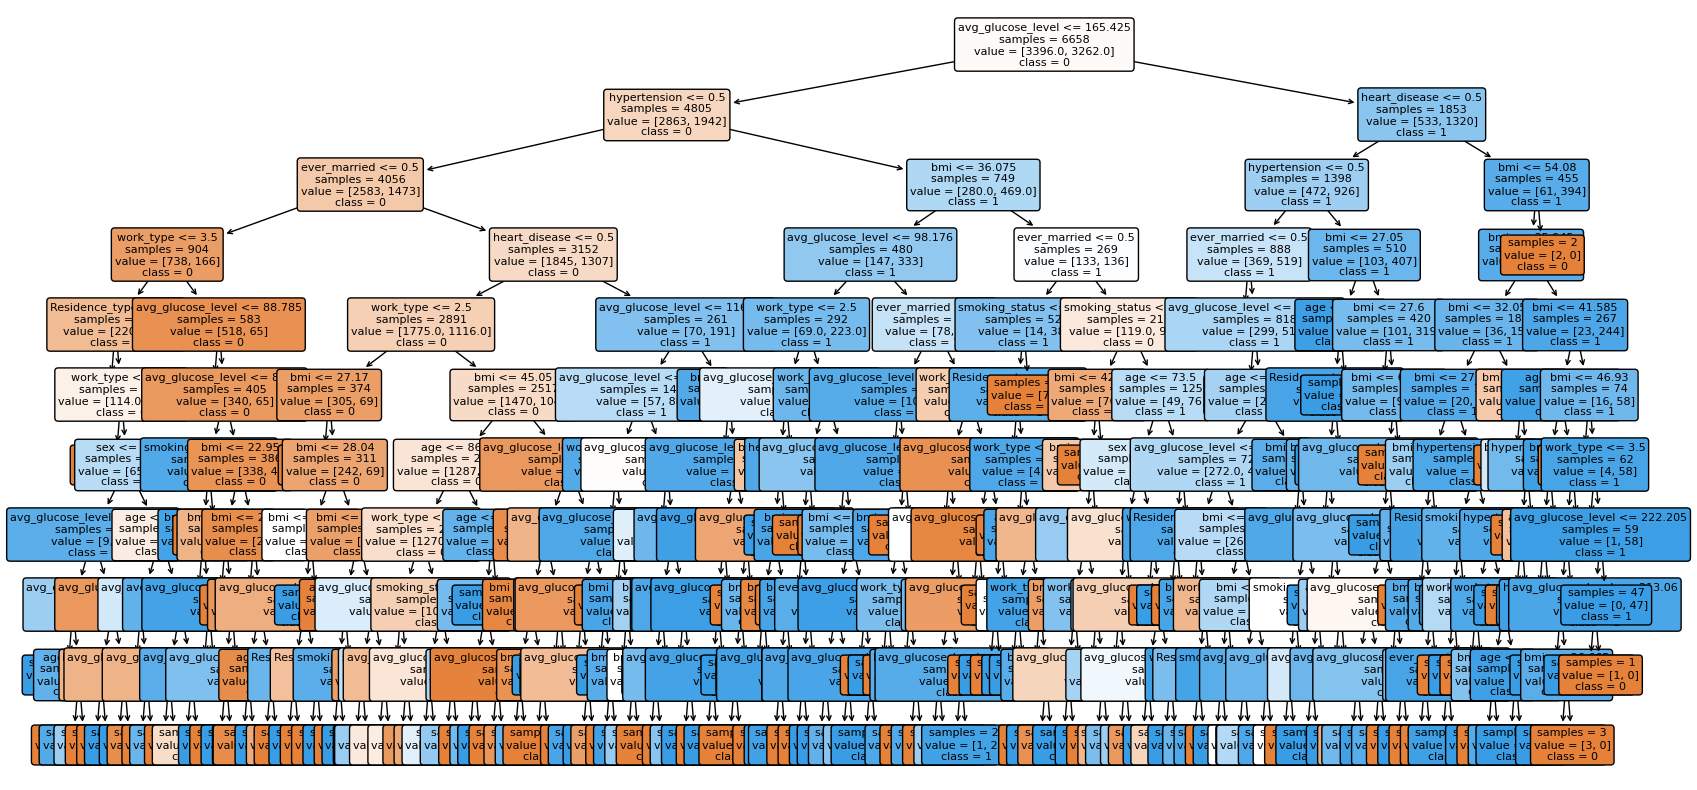

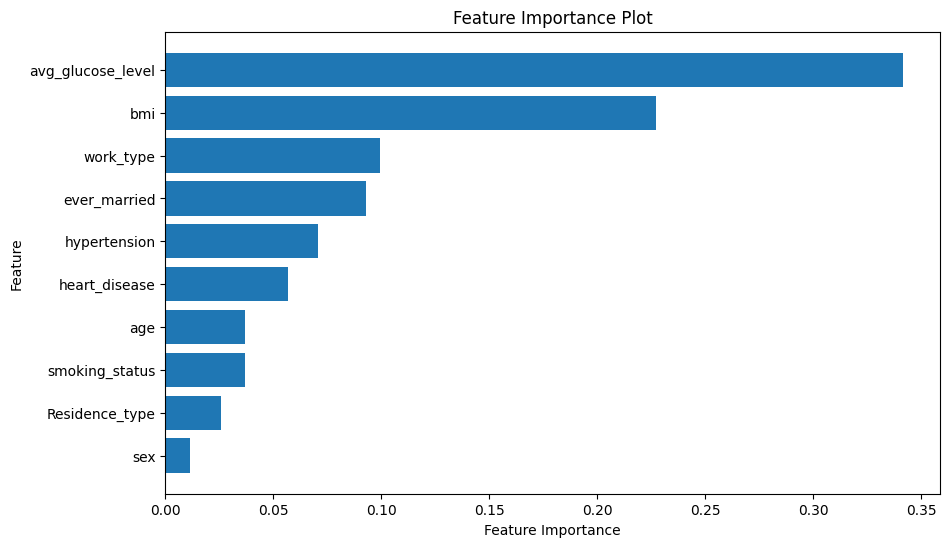

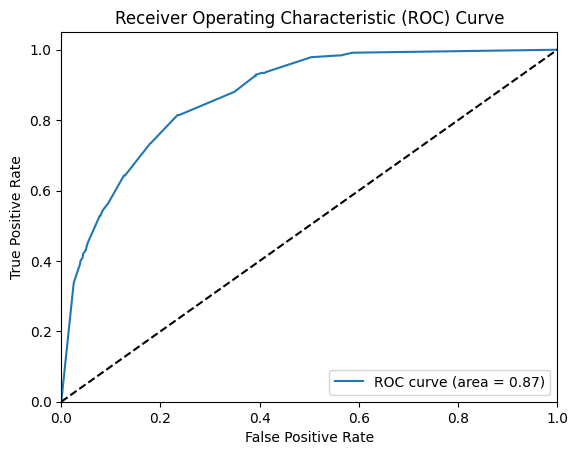

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.8701894719058136
Accuracy for each fold: [0.8111888111888111, 0.8356643356643356, 0.7902097902097902, 0.8391608391608392, 0.8140350877192982, 0.7894736842105263, 0.7894736842105263, 0.8280701754385965, 0.8245614035087719, 0.7894736842105263]
Mean accuracy: 0.8111311495522022
95% confidence interval: (0.7966107554315032, 0.8256515436729013)


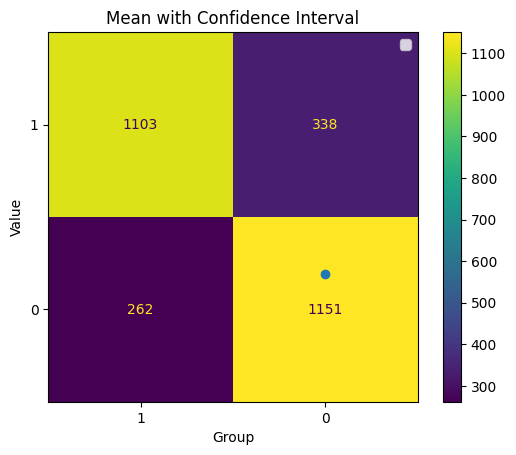


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.63      0.81      0.71      1441
           1       0.72      0.51      0.60      1413

    accuracy                           0.66      2854
   macro avg       0.68      0.66      0.65      2854
weighted avg       0.68      0.66      0.65      2854



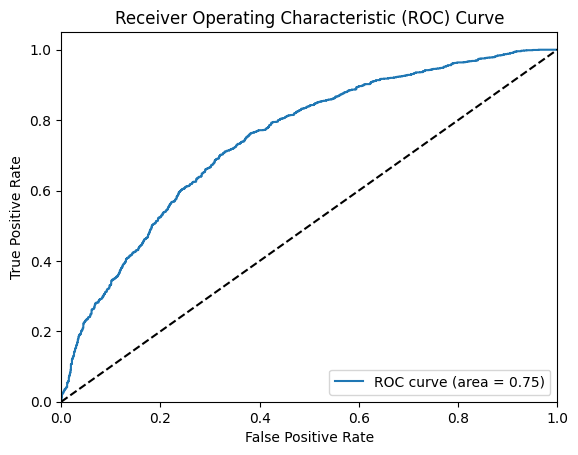

AUC Score: 0.74653423916807


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6643356643356644, 0.6468531468531469, 0.7027972027972028, 0.6468531468531469, 0.6526315789473685, 0.6912280701754386, 0.6350877192982456, 0.6456140350877193, 0.712280701754386, 0.6596491228070176]
Mean accuracy: 0.6657330388909337
95% confidence interval: (0.6465708194722121, 0.6848952583096554)


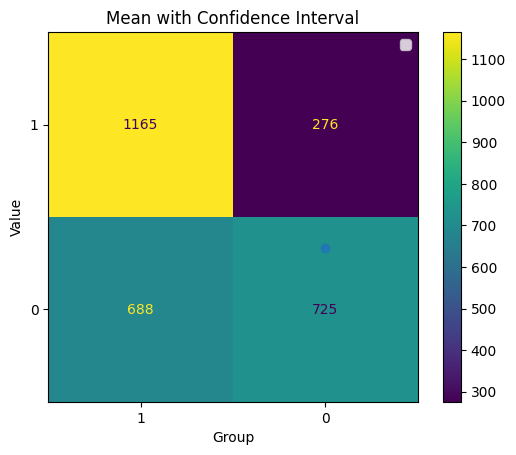

In [4]:
print('ADDING 10% TO FEATURE: avg_glucose_level & bmi')
print('--------------------------------------')
df_modified = util_inaccuracy.modify_values('avg_glucose_level',df, 50)
df_modified = util_inaccuracy.modify_values('bmi',df_modified, 50)
print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.model_dt(df_modified, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
svm = ML_algorithms.model_svm(df_modified, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 

adding inaccuracies to non binary features

ADDING 10% TO MODIFIABLE FEATURES
--------------------------------------
Modifying 4756 rows in column 'avg_glucose_level'
Rows to modify: [4707, 5896, 3892, 5235, 3313, 1471, 5513, 8822, 3300, 1606, 4439, 3227, 9363, 2851, 7184, 4093, 9325, 5378, 1404, 2909, 4346, 7351, 1760, 5268, 6338, 1593, 3059, 3726, 375, 6613, 1518, 8358, 8569, 9397, 4717, 432, 6116, 7806, 6491, 8079, 3122, 6985, 5681, 314, 5481, 4759, 9330, 4680, 2415, 1009, 8388, 3995, 8136, 2812, 4518, 2661, 2603, 5596, 21, 4681, 7659, 2838, 2612, 4880, 4513, 2693, 904, 2881, 8429, 8531, 1370, 6764, 8268, 4768, 1945, 6497, 6672, 7163, 4485, 4257, 2298, 8988, 6585, 2222, 63, 2193, 7802, 6450, 8625, 361, 6314, 8266, 7590, 2894, 9265, 7515, 6891, 8400, 8509, 3503, 750, 4116, 8152, 4706, 1778, 3584, 7514, 5339, 357, 7668, 4150, 3675, 9399, 9459, 9443, 6709, 2777, 4189, 8797, 4995, 4686, 9364, 8491, 3922, 125, 7153, 2071, 6594, 1983, 5164, 2647, 2049, 4353, 3911, 5704, 3208, 394, 2514, 8134, 3448, 7949, 4430, 1388, 6144, 1585, 910

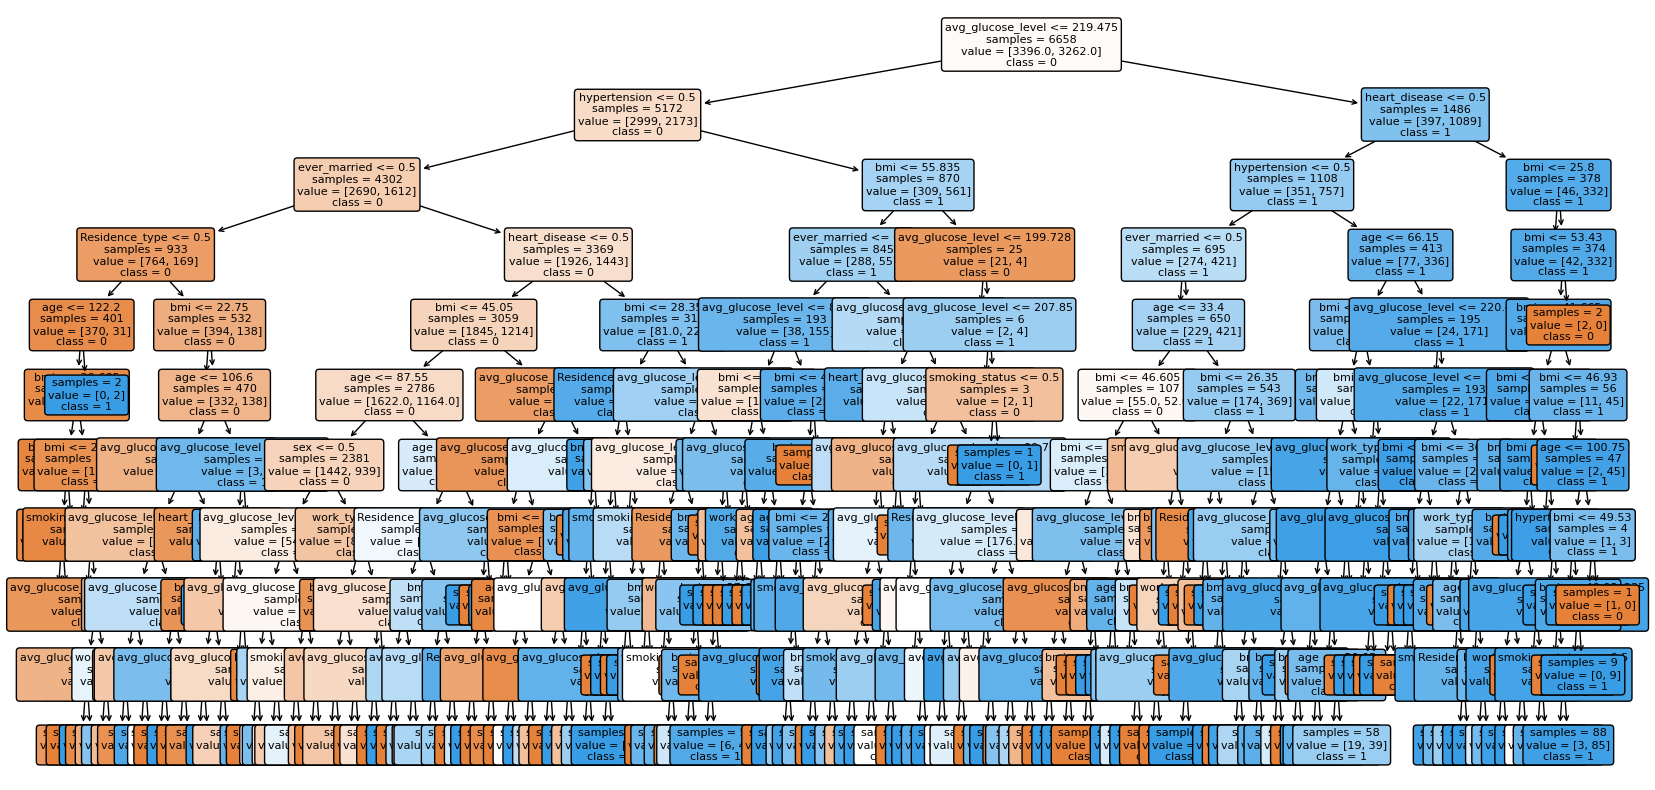

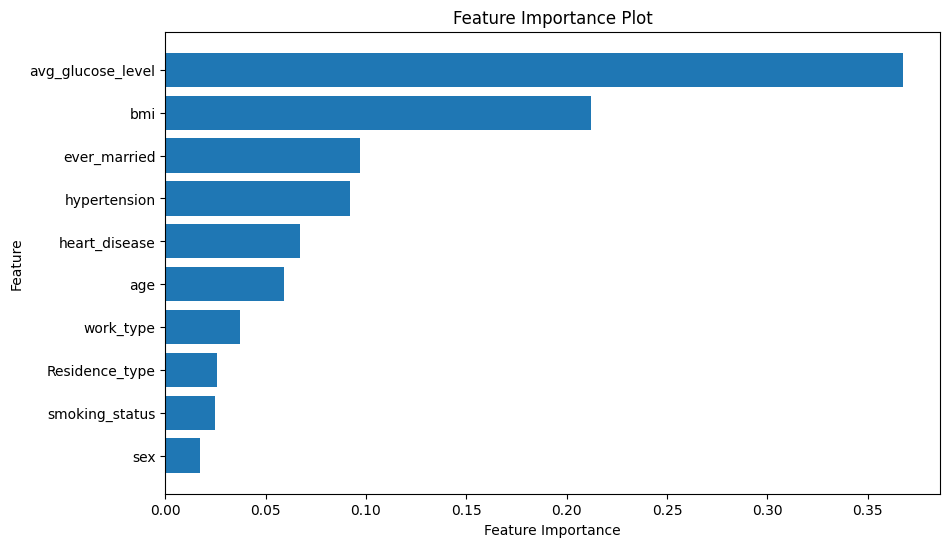

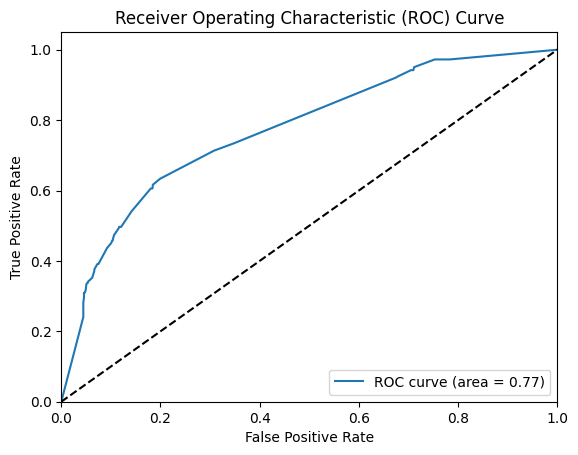

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.7712929361687082
Accuracy for each fold: [0.7867132867132867, 0.7972027972027972, 0.8146853146853147, 0.7972027972027972, 0.8070175438596491, 0.7964912280701755, 0.8070175438596491, 0.8175438596491228, 0.8105263157894737, 0.7964912280701755]
Mean accuracy: 0.8030891915102443
95% confidence interval: (0.796120352091529, 0.8100580309289596)


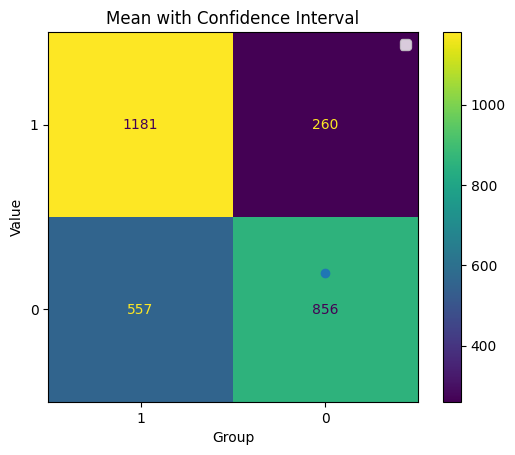


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.61      0.84      0.71      1441
           1       0.73      0.44      0.55      1413

    accuracy                           0.64      2854
   macro avg       0.67      0.64      0.63      2854
weighted avg       0.67      0.64      0.63      2854



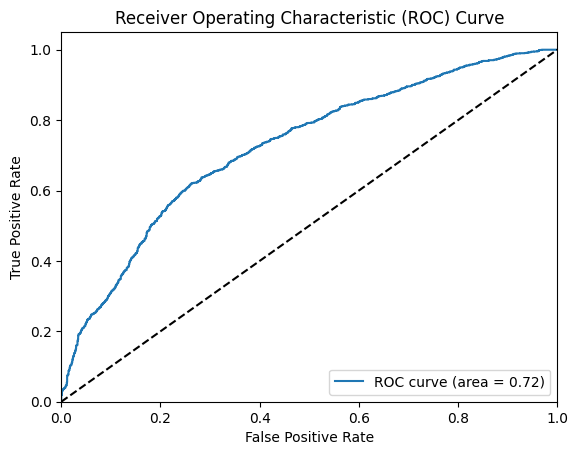

AUC Score: 0.7239173472459806


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6188811188811189, 0.6713286713286714, 0.6643356643356644, 0.6048951048951049, 0.6596491228070176, 0.6736842105263158, 0.6666666666666666, 0.6631578947368421, 0.6701754385964912, 0.6842105263157895]
Mean accuracy: 0.6576984419089682
95% confidence interval: (0.6396122418530888, 0.6757846419648476)


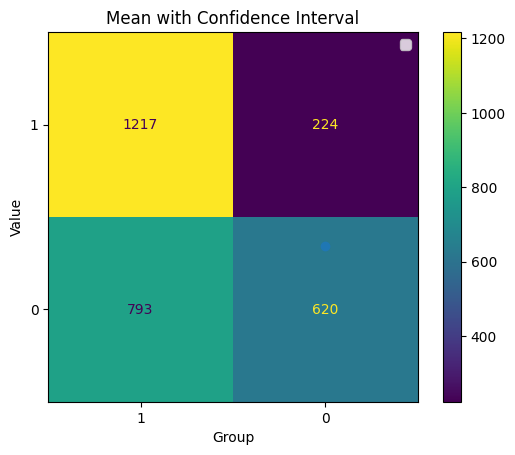

In [5]:
print('ADDING 10% TO MODIFIABLE FEATURES')
print('--------------------------------------')
df_modified = util_inaccuracy.modify_values('avg_glucose_level',df, 50)
for column in ['work_type','age','bmi', 'avg_glucose_level']:
    df_modified = util_inaccuracy.modify_values(column,df_modified, 50)
print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.model_dt(df_modified, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
svm = ML_algorithms.model_svm(df_modified, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 